# King County Dataset Linear Regression Model 11

### Adjustments for this model:
    Start with getting rid of 'id',
    Then deal with the NaN's in 'view', 'yr_renovated', 'waterfront', and 'sqft_basement'
    Change "?" in 'sqft_basement'
    Take care of outlier in bedrooms
    Deal with the date feature
    Bin: 'view', 'grade', 'sqft_basement', 'yr_renovated', 'waterfront', 'condition'
    Lot Transform: 'sqft_above', 'sqft_living','sqft_lot', 'sqft_living15', 'sqft_lot15' are skewed right.
    Max/Min: 
    Standardization: 'sqft_above', 'sqft_living','sqft_lot','sqft_living15', 'sqft_lot15'
   

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [224]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [225]:
# Change "?" in 'sqft_basement' to '0';
data.sqft_basement = data.sqft_basement.replace(to_replace = '?', value = '0')

In [226]:
# Account for missing data in 'waterfront', 'view', 'yr_renovated';
data.waterfront.fillna(value=data.waterfront.median(), inplace = True)
data.view.fillna(value=data.view.median(), inplace = True)
data.yr_renovated.fillna(value=data.yr_renovated.median(), inplace = True)
data.sqft_basement.fillna(value=data.sqft_basement.median(), inplace = True)


In [227]:
# Change outlier '33' to '3' in 'bedrooms';
data.at[15856,'bedrooms'] = 3

In [228]:
#Old version.  Still not working!
####import datetime as dt
####data['date'] = pd.to_datetime(data.date)

In [229]:
# Change 'date' feature to float;
import datetime as dt

#Run this code first and then change it!
data["date"] = pd.to_datetime(data["date"], format = "%m/%d/%Y")

# I want day first, but it won't work this way.
#data["date"] = pd.to_datetime(data["date"], format = "%d/%m/%Y")

(array([2326., 2940., 2589., 2242., 2247., 1926., 1294., 1704., 2670.,
        1659.]),
 array([735355., 735394., 735433., 735472., 735511., 735550., 735589.,
        735628., 735667., 735706., 735745.]),
 <a list of 10 Patch objects>)

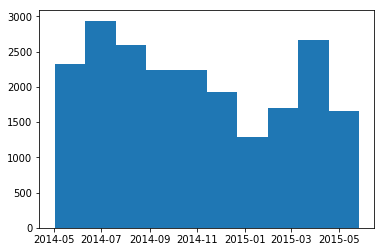

In [230]:
plt.hist(data.date)

In [231]:
# Change 'sqft_basement' from an object to a float:
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [232]:
data = data.drop(["id"], axis=1)

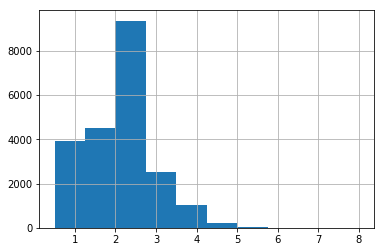

In [233]:
data.bathrooms.hist()

In [234]:
data.bathrooms.describe()

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [235]:
data.loc[data["bathrooms"] == 8]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,0.0,3.0,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
12764,2014-05-05,2280000.0,7,8.0,13540,307752,3.0,0.0,4.0,3,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


In [236]:
# Drop 'bathrooms' that are greater than '7'
data = data[data.bathrooms != 8]
data = data[data.bathrooms != 7.75]
data = data[data.bathrooms != 7.5]

In [237]:
data = data[data.bathrooms < 7]

In [238]:
data.bathrooms.std()*4 + data.bathrooms.mean()

5.175294995132291

In [239]:
len(data.loc[data["bathrooms"] > 6])

6

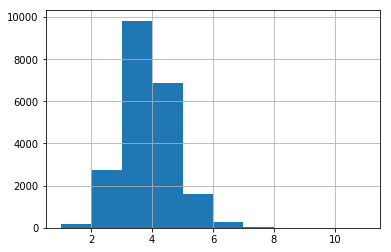

In [240]:
data.bedrooms.hist()

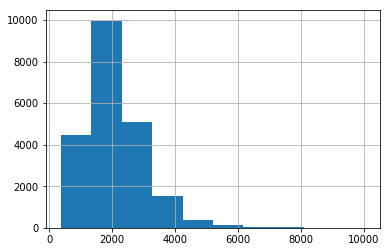

In [241]:
data.sqft_living.hist()

In [242]:
data.sqft_living.mean()*3

6236.6296021858925

In [243]:
len(data.loc[data["sqft_living"] > 6200])

53

In [244]:
data = data[data.sqft_living < 6200]

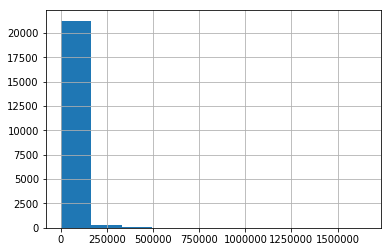

In [245]:
data.sqft_lot.hist()

In [179]:
data.sqft_lot.mean()

14932.557572662272

In [246]:
# Three standard deviations is about a half acre
data.sqft_lot.std()*3

122350.72664125015

In [249]:
data.sqft_lot.mean()+data.sqft_lot.std()*4

178066.8597609958

In [250]:
# Number of homes that have more than a 1 acre lot or 43560 sqft.
len(data.loc[data["sqft_lot"] > 178066])

284

In [251]:
data = data[data.sqft_lot < 178066]

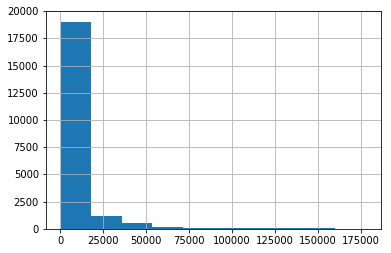

In [253]:
data.sqft_lot.hist()

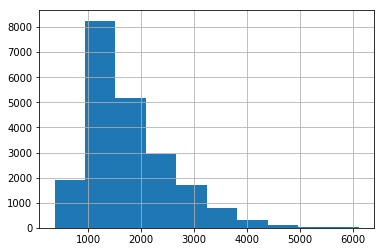

In [254]:
data.sqft_above.hist()

In [255]:
data.sqft_above.describe()

count    21254.000000
mean      1768.170556
std        792.573590
min        370.000000
25%       1190.000000
50%       1550.000000
75%       2190.000000
max       6110.000000
Name: sqft_above, dtype: float64

In [256]:
data.sqft_above.std()*3

2377.7207688673534

In [259]:
data.sqft_above.mean()+data.sqft_above.std()*4

4938.464914620416

In [261]:
len(data.loc[data["sqft_above"] > 4938])

50

In [262]:
data = data[data.sqft_above < 4938]

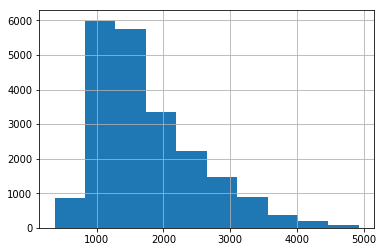

In [263]:
data.sqft_above.hist()

In [264]:
data.yr_built.unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

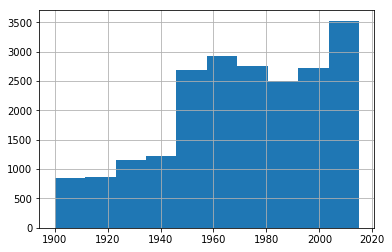

In [265]:
# Left skewed.
data.yr_built.hist()

In [266]:
data.yr_built.mean()-data.yr_built.std()*3

1882.4920488988796

In [267]:
# Left skewed?  Do I need to normalize this?

In [268]:
data.yr_renovated.describe()

count    21204.000000
mean        68.527731
std        363.452230
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

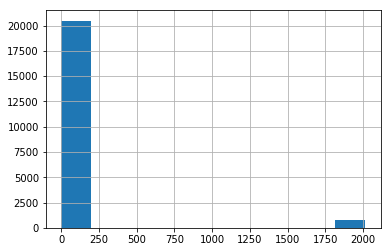

In [269]:
data.yr_renovated.hist()

In [270]:
data.yr_renovated.describe()

count    21204.000000
mean        68.527731
std        363.452230
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

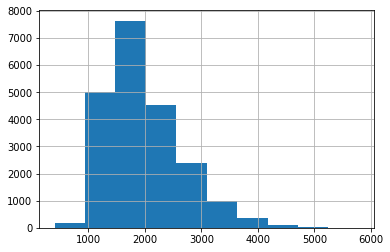

In [274]:
data.sqft_living15.hist()

In [275]:
data.sqft_living15.mean()+data.sqft_living15.std()*4

4654.411974016826

In [276]:
len(data.loc[data["sqft_living15"] > 4654])

39

In [277]:
# Let's get rid of the outliers
data = data[data.sqft_living15 < 4654]

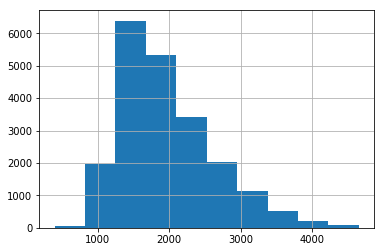

In [278]:
data.sqft_living15.hist()

In [279]:
data.sqft_lot15.std()*3

50538.86537931864

In [280]:
data.sqft_lot15.mean()+data.sqft_lot15.std()*4

77975.12912848439

In [281]:
len(data.loc[data["sqft_lot15"] > 77975])

209

In [282]:
# Let's get rid of the outliers
data = data[data.sqft_lot15 < 77975]

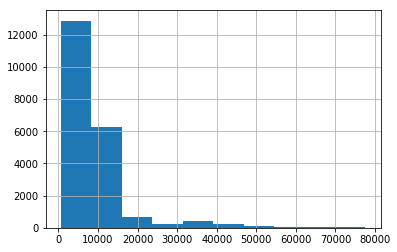

In [283]:
data.sqft_lot15.hist()

In [284]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.095600e+04,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000
mean,5.278178e+05,3.364573,2.095235,2039.836181,10361.298387,1.490408,0.006251,0.221607,3.412913,7.623401,1751.481533,282.648215,1970.627744,68.767370,98078.923840,47.561855,-122.218707,1962.841382,9311.800534
std,3.289964e+05,0.898703,0.741238,842.823930,12705.656613,0.540225,0.078819,0.744561,0.651854,1.127388,764.727323,429.139247,29.457175,364.065053,53.740893,0.137699,0.137164,656.023138,8643.144204
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,460.000000,651.000000
25%,3.200000e+05,3.000000,1.500000,1413.750000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.475200,-122.330000,1480.000000,5040.000000
50%,4.494500e+05,3.000000,2.250000,1900.000000,7500.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1547.000000,0.000000,1974.000000,0.000000,98070.000000,47.573800,-122.238000,1820.000000,7519.000000
75%,6.350000e+05,4.000000,2.500000,2510.000000,10209.250000,2.000000,0.000000,0.000000,4.000000,8.000000,2170.000000,550.000000,1996.000000,0.000000,98118.000000,47.678925,-122.133000,2340.000000,9800.000000
max,3.800000e+06,11.000000,6.000000,6160.000000,177657.000000,3.500000,1.000000,4.000000,5.000000,13.000000,4930.000000,2850.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,4650.000000,77536.000000


In [285]:
# Create bins for 'yr_renovated' based on the values observed. 4 values will result in 3 bins
bins_A = [0, 1900,  2000, 2020]
bins_yr_renovated = pd.cut(data['yr_renovated'], bins_A)
#bins_yr_renovated = bins_yr_renovated.as_unordered()


yr_renovated_dummy = pd.get_dummies(bins_yr_renovated, prefix="yr-ren", drop_first=True)
data = data.drop(["yr_renovated"], axis=1)
data = pd.concat([data, yr_renovated_dummy], axis=1)

In [286]:
# Create bins for 'sqft_basement' based on the values observed. 3 values will result in 2 bins
bins_B = [0, 100, 5000]
bins_sqft_basement = pd.cut(data['sqft_basement'], bins_B)

sqft_basement_dummy = pd.get_dummies(bins_sqft_basement, prefix="sqft_base", drop_first=True)
data = data.drop(["sqft_basement"], axis=1)
data = pd.concat([data, sqft_basement_dummy], axis=1)

In [287]:
# Create bins for 'view' based on the values observed. 3 values will result in 2 bins
bins_C = [0, 2, 4]
bins_view = pd.cut(data['view'], bins_C)

view_dummy = pd.get_dummies(bins_view, prefix="new_view", drop_first=True)
data = data.drop(["view"], axis=1)
data = pd.concat([data, view_dummy], axis=1)

In [288]:
# Create bins for 'grade' based on the values observed. 4 values will result in 3 bins
bins_D = [0, 5, 7, 13]
bins_grade = pd.cut(data['grade'], bins_D)

grade_dummy = pd.get_dummies(bins_grade, prefix="new_grade", drop_first=True)
data = data.drop(["grade"], axis=1)
data = pd.concat([data, grade_dummy], axis=1)

In [289]:
# Create bins for 'waterfront' based on the values observed. 3 values will result in 2 bins
bins_E = [0, 0.5, 1]
bins_waterfront = pd.cut(data['waterfront'], bins_E)

waterfront_dummy = pd.get_dummies(bins_waterfront, prefix="new_waterfront", drop_first=True)
data = data.drop(["waterfront"], axis=1)
data = pd.concat([data, waterfront_dummy], axis=1)

In [290]:
# Create bins for 'condition' based on the values observed. 4 values will result in 3 bins
bins_G = [0, 3, 4, 5]
bins_condition = pd.cut(data['condition'], bins_G)

condition_dummy = pd.get_dummies(bins_condition, prefix="new_condition", drop_first=True)
data = data.drop(["condition"], axis=1)
data = pd.concat([data, condition_dummy], axis=1)

### Log Transformation: These features have right skewed histograms
'sqft_above', 'sqft_lot', 'sqft_living', 'sqft_living15', 'sqft_lot15'

In [291]:
# Perform log transformation
logabove = np.log(data["sqft_above"])
loglot = np.log(data["sqft_lot"])
logliving = np.log(data["sqft_living"])
loglivingnear = np.log(data["sqft_living15"])
loglotnear = np.log(data["sqft_lot15"])

# Switch the Standardization into the original data
data["sqft_above"] = (logabove-np.mean(logabove))/np.sqrt(np.var(logabove))
data["sqft_lot"] = (loglot-np.mean(loglot))/np.sqrt(np.var(loglot))
data["sqft_living"] = (logliving-np.mean(logliving))/np.sqrt(np.var(logliving))
data["sqft_living15"] = (loglivingnear-np.mean(loglivingnear))/np.sqrt(np.var(loglivingnear))
data["sqft_lot15"] = (loglotnear-np.mean(loglotnear))/(np.sqrt(np.var(loglotnear)))

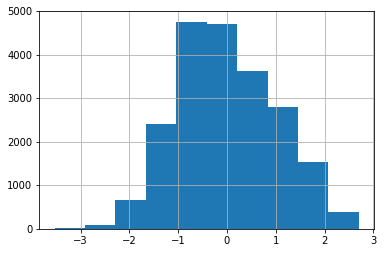

In [292]:
data.sqft_above.hist()


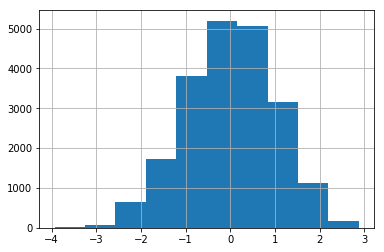

In [293]:
data.sqft_living.hist()


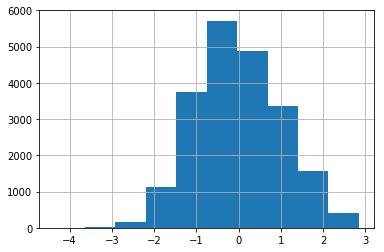

In [294]:
data.sqft_living15.hist()


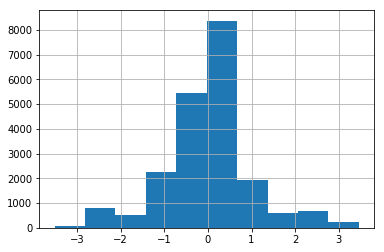

In [295]:
data.sqft_lot15.hist()


In [296]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,lat,...,sqft_lot15,"yr-ren_(1900, 2000]","yr-ren_(2000, 2020]","sqft_base_(100, 5000]","new_view_(2, 4]","new_grade_(5, 7]","new_grade_(7, 13]","new_waterfront_(0.5, 1.0]","new_condition_(3, 4]","new_condition_(4, 5]"
count,2.095600e+04,20956.000000,20956.000000,2.095600e+04,2.095600e+04,20956.000000,2.095600e+04,20956.000000,20956.000000,20956.000000,...,2.095600e+04,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000,20956.000000
mean,5.278178e+05,3.364573,2.095235,1.030755e-16,-9.005543e-16,1.490408,2.441262e-16,1970.627744,98078.923840,47.561855,...,1.844509e-16,0.018086,0.016368,0.381418,0.035646,0.516463,0.471225,0.006251,0.263600,0.079738
std,3.289964e+05,0.898703,0.741238,1.000024e+00,1.000024e+00,0.540225,1.000024e+00,29.457175,53.740893,0.137699,...,1.000024e+00,0.133264,0.126888,0.485746,0.185411,0.499741,0.499183,0.078819,0.440595,0.270894
min,7.800000e+04,1.000000,0.500000,-3.933549e+00,-3.453505e+00,1.000000,-3.535548e+00,1900.000000,98001.000000,47.155900,...,-3.519386e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000e+05,3.000000,1.500000,-6.861285e-01,-5.111174e-01,1.000000,-7.406812e-01,1951.000000,98033.000000,47.475200,...,-5.291896e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.494500e+05,3.000000,2.250000,2.999648e-02,1.598961e-02,1.500000,-8.809002e-02,1974.000000,98070.000000,47.573800,...,5.525751e-02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,6.350000e+05,4.000000,2.500000,7.045038e-01,4.168999e-01,2.000000,7.274318e-01,1996.000000,98118.000000,47.678925,...,4.423533e-01,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,3.800000e+06,11.000000,6.000000,2.879453e+00,4.130446e+00,3.500000,2.704985e+00,2015.000000,98199.000000,47.777600,...,3.464266e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [297]:
y = pd.DataFrame(data, columns = ['price'])
X = data.drop(["price", "lat", 'long', "zipcode", 'date'], axis=1)

In [298]:
import statsmodels.api as sm
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     7066.
Date:                Wed, 16 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:48:38   Log-Likelihood:            -2.8880e+05
No. Observations:               20956   AIC:                         5.776e+05
Df Residuals:                   20938   BIC:                         5.778e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
bedrooms                  -2.032e+04   2403.680     -8.452      0.000    -2.5e+04   -1.56e+04
bathrooms                   1.97e+04   3743.344      5.261      0.000    1.24e+04     2.7e+04
sqft_living                1.823e+04   6798.947      2.681      0.007    4903.297    3.16e+04
sqft_lot                  -4293.1183   4019.296     -1.068      0.285   -1.22e+04    3585.013
floors                    -7781.0931   4824.078     -1.613      0.107   -1.72e+04    1674.473
sqft_above                 1.058e+05   6642.825     15.933      0.000    9.28e+04    1.19e+05
yr_built                    215.2868     10.132     21.247      0.000     195.426     235.147
sqft_living15              6.718e+04   2663.370     25.223      0.000     6.2e+04    7.24e+04
sqft_lot15                -2.565e+04   3949.622     -6.494      0.000   -3.34e+04   -1.79e+04
yr-ren_(1900, 2000]        1.014e+05   1.22e+04      8.289      0.000    7.74e+04    1.25e+05
yr-ren_(2000, 2020]        2.324e+05   1.29e+04     18.064      0.000    2.07e+05    2.58e+05
sqft_base_(100, 5000]      1.235e+05   6781.902     18.217      0.000     1.1e+05    1.37e+05
new_view_(2, 4]            2.646e+05   9772.788     27.080      0.000    2.45e+05    2.84e+05
new_grade_(5, 7]           1.215e+04   1.51e+04      0.803      0.422   -1.75e+04    4.18e+04
new_grade_(7, 13]          8.729e+04   1.59e+04      5.485      0.000    5.61e+04    1.18e+05
new_waterfront_(0.5, 1.0]  5.883e+05   2.25e+04     26.169      0.000    5.44e+05    6.32e+05
new_condition_(3, 4]       6.092e+04   3940.287     15.461      0.000    5.32e+04    6.86e+04
new_condition_(4, 5]       1.519e+05   6222.074     24.416      0.000     1.4e+05    1.64e+05
==============================================================================
Omnibus:                    11251.083   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           170485.738
Skew:                           2.243   Prob(JB):                         0.00
Kurtosis:                      16.233   Cond. No.                     2.79e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [299]:
# Perform a train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
# A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

15717 5239 15717 5239


In [300]:
# Apply your model to the train set
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [301]:
# Calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# Calculate training and test residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [302]:
#Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 48402582987.10784
Test Mean Squarred Error: 51420010761.04969


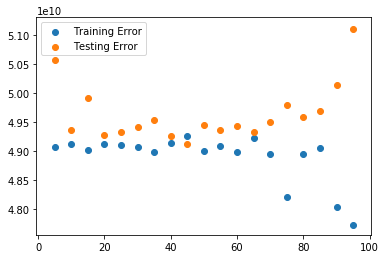

In [303]:
#Evaluate the effect of train-test split 
import random
random.seed(8)
train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [304]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_5_results

-49759143912.217896

## Results

###### R-squared: 0.859. The P value looks better as well as the test-train split.


# Column Names and descriptions for Kings County Data Set
* **id**                    Drop - categorical data, has no meaning
* **dateDate**              Object - need to change format or categorize by month or year
* **pricePrice** -          Independent Variable
* **bedroomsNumber** -      Has an outlier of 33. Either drop this row or change it to the median '3'
* **bathroomsNumber** -     Continuous
* **sqft_livingsquare** -   Continuous but could effect multicolinearity
* **sqft_lotsquare** -      Continuous but could also effect multicolinearity
* **floorsTotal** -         Categorical 
* **waterfront** -          Has missing data, lots of zeros, and is categorical - drop or clean up and bin
* **view** -                Also has missing data, is categorical - clean up and bin
* **condition** -           Categorical - could be binned
* **grade** -               Categorical - could be binned
* **sqft_above** -          Continuous but could effect multilinearity - probably going to drop
* **sqft_basement** -       Missing data, has many "?", and is an object. 
* **yr_built** -            Continuous
* **yr_renovated** -        Has lots of zeros
* **zipcode** -             Categorical data - could be dropped or binned based on location.
* **lat** -                 
* **long** -                
* **sqft_living15** -       Continuous but with outliers - also could effect multicoliniarity.
* **sqft_lot15** -          Continuous but with outliers - also could effect multicoliniarity.